<a href="https://colab.research.google.com/github/smgoggin10/ESCHR/blob/main/docs/notebooks/paul15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESCHR analysis of mouse hematopoiesis

Finding population strucutures in scRNAseq of myeloid and erythroid differentiation from [Paul et al. (2015)](http://doi.org/10.1016/j.cell.2015.11.013).

## Setup environment

In [1]:
!pip install git+https://github.com/zunderlab/eschr.git

  Cloning https://github.com/zunderlab/eschr.git to /tmp/pip-req-build-dsc2fuvq
  Running command git clone --filter=blob:none --quiet https://github.com/zunderlab/eschr.git /tmp/pip-req-build-dsc2fuvq
  Resolved https://github.com/zunderlab/eschr.git to commit ed17391752070fac31eb48920db845b3b398c585
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.6 MB/s eta 0:00:00


In [2]:
import eschr as es

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc

In [4]:
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
results_file = './write/paul15.h5ad'
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures

## Read in and preprocess data

In [5]:
adata = sc.datasets.paul15()
adata

  0%|          | 0.00/9.82M [00:00<?, ?B/s]

... storing 'paul15_clusters' as categorical
Trying to set attribute `._uns` of view, copying.


AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'

Apply a simple [preprocessing recipe](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.pp.recipe_zheng17.html).

In [6]:
sc.pp.recipe_zheng17(adata)

In [7]:
adata

AnnData object with n_obs × n_vars = 2730 × 999
    obs: 'paul15_clusters', 'n_counts_all'
    var: 'n_counts', 'mean', 'std'
    uns: 'iroot', 'log1p'

## Run ESCHR analysis

In [8]:
# Create the zarr store that will be used for interacting with your data
#from ESCHR import _read_write_utils as es_rw
zarr_loc = "./data/paul15.zarr"
#es_rw.make_zarr(data=adata.X, zarr_loc=zarr_loc)
es.make_zarr(data=adata.X, zarr_loc=zarr_loc)

In [9]:
# Initialize a ConsensusCluster instance
# (add any optional hyperparameter specifications,
# but bear in mind the method was designed to work for
# diverse datasets with the default settings.

# Note that Colab will run single-core so runtime will be
# substantially longer than when run with multiple cores,
# as the multi-process parallelization in the ensemble stage
# cannot occur in a single core scenario

cc_obj = es.ConsensusCluster(zarr_loc=zarr_loc,ensemble_size=150)


In [10]:
# Now you can run the method with your prepped data:
cc_obj.consensus_cluster()



starting ensemble clustering multiprocess
Ensemble clustering finished in -1702651876.663535 seconds
starting consensus multiprocess
resolution: 0.05
# soft clusters: 35
# hard clusters: 5
resolution: 0.075
# soft clusters: 58
# hard clusters: 6
resolution: 0.1
# soft clusters: 22
# hard clusters: 8
resolution: 0.125
# soft clusters: 27
# hard clusters: 8
resolution: 0.15
# soft clusters: 41
# hard clusters: 8
resolution: 0.175
# soft clusters: 45
# hard clusters: 8
resolution: 0.2
# soft clusters: 49
# hard clusters: 8
resolution: 0.225
# soft clusters: 65
# hard clusters: 8
resolution: 0.25
# soft clusters: 35
# hard clusters: 9
resolution: 0.275
# soft clusters: 40
# hard clusters: 9
resolution: 0.3
# soft clusters: 43
# hard clusters: 9
resolution: 0.325
# soft clusters: 53
# hard clusters: 9
resolution: 0.35
# soft clusters: 48
# hard clusters: 9
resolution: 0.375
# soft clusters: 55
# hard clusters: 9
resolution: 0.4
# soft clusters: 40
# hard clusters: 9
resolution: 0.425
# soft

In [11]:
# For most built-in visualizations and/or
# for compatibility with scverse suite of tools,
# you should next generate an AnnData object containing all outputs.
# There is a ConsensusCluster class method for doing this!
# This will add the AnnData object as an attribute to the
# ConsensusCluster object. It also works to add the ESCHR
# clustering attributes to an existing adata:
adata = cc_obj.make_adata( data = adata,
    return_adata = True
)
adata

AnnData object with n_obs × n_vars = 2730 × 999
    obs: 'paul15_clusters', 'n_counts_all', 'hard_clusters', 'cell_conf_score'
    var: 'n_counts', 'mean', 'std'
    uns: 'iroot', 'log1p'
    obsm: 'soft_membership_matrix'

## ESCHR visualizations

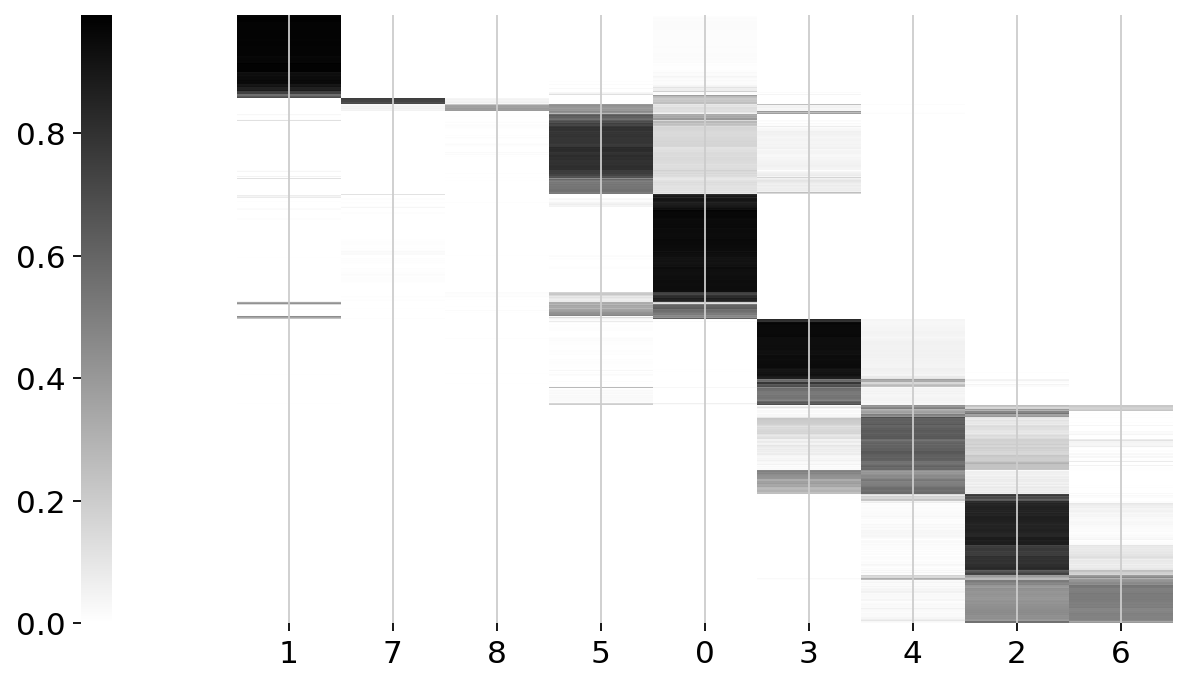

In [13]:
# Plot soft membership matrix heatmap visualization
es.make_smm_heatmap(cc_obj)

'X_umap'
No umap found - running umap...


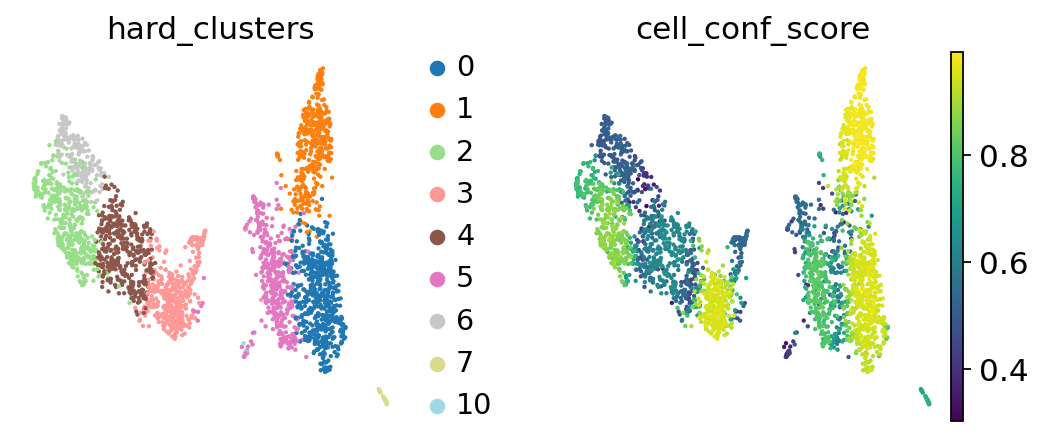

In [14]:
# Plot UMAP layout with points colored by
# ESCHR hard cluster labels and by confidence scores
es.plot_umap(cc_obj)

## Scanpy visualizations

In [15]:
# You can also use Scanpy to prepare a umap layout
# (or swap in your favorite 2D layout)
# to visualize the clustering results
sc.tl.pca(adata, n_comps=50)
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.umap(adata)

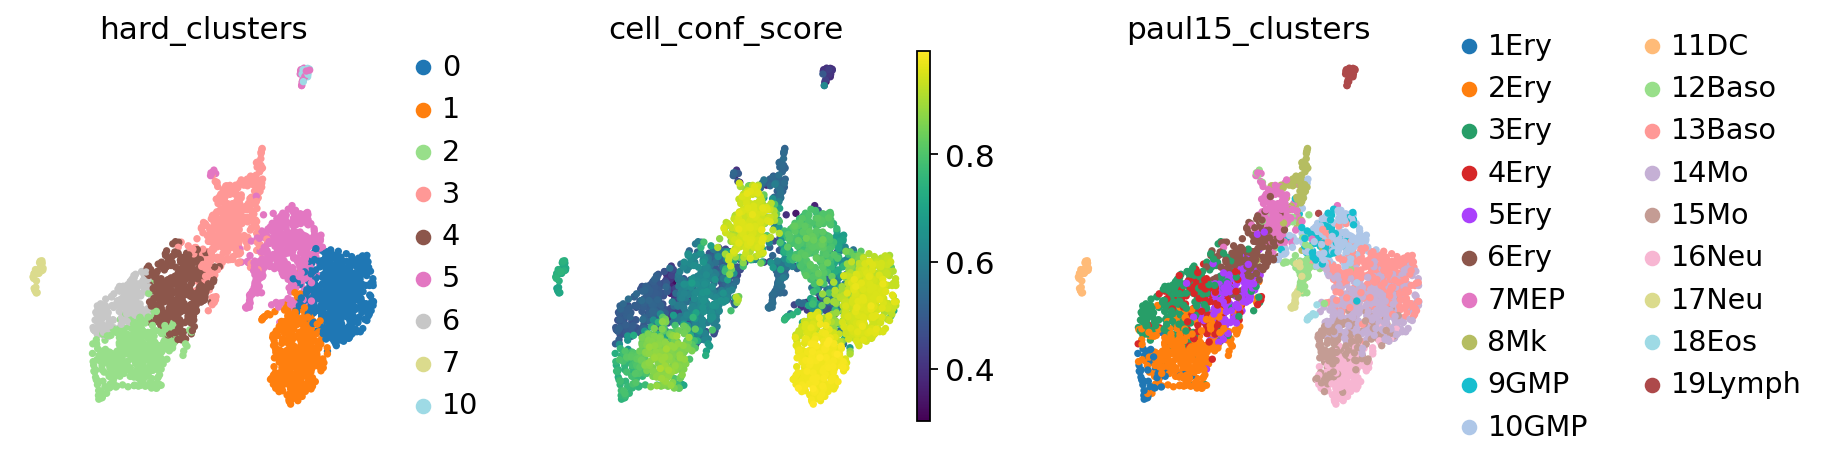

In [16]:
sc.pl.umap(adata, color=['hard_clusters', 'cell_conf_score', 'paul15_clusters'],show=True) #, 'leiden'

In [17]:
cell_type_markers = ['Procr','Gata1', 'Klf1', 'Epor', 'Gypa', 'Hba-a2',
                     'Hba-a1', 'Spi1', 'Elane', 'Cebpe', 'Ctsg', 'Mpo',
                     'Gfi1','Irf8', 'Csf1r', 'Ctsg', 'Mpo','Itga2b',
                     'Pbx1', 'Sdpr', 'Vwf','Mcpt8', 'Prss34','Cd19',
                     'Vpreb2', 'Cd79a','Cma1', 'Gzmb', 'Cd117','Ms4a2',
                     'Fcer1a', 'Cpa3', 'CD203c']
cell_type_markers = [x for x in cell_type_markers if x in adata.var_names]

## Downstream scverse analyses with ESCHR clusters

ESCHR clusters can be used for external downstream analyses such as PAGA

In [18]:
sc.tl.paga(adata, groups='hard_clusters')

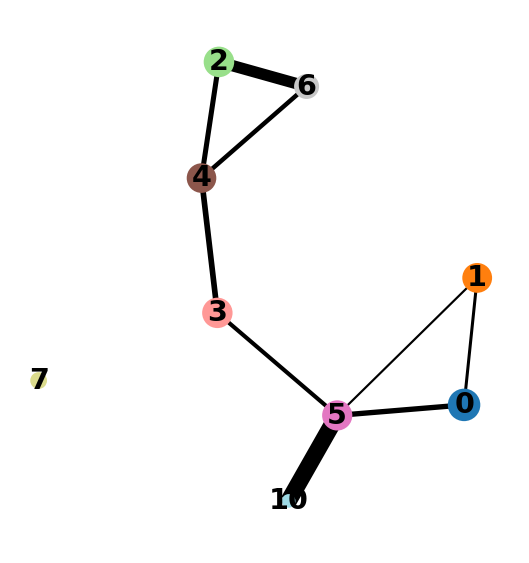

In [19]:
plt.rcParams["figure.figsize"] = [4,4]
sc.pl.paga(adata, color=['hard_clusters']) #, 'hard_clusters', 'cell_conf_score'

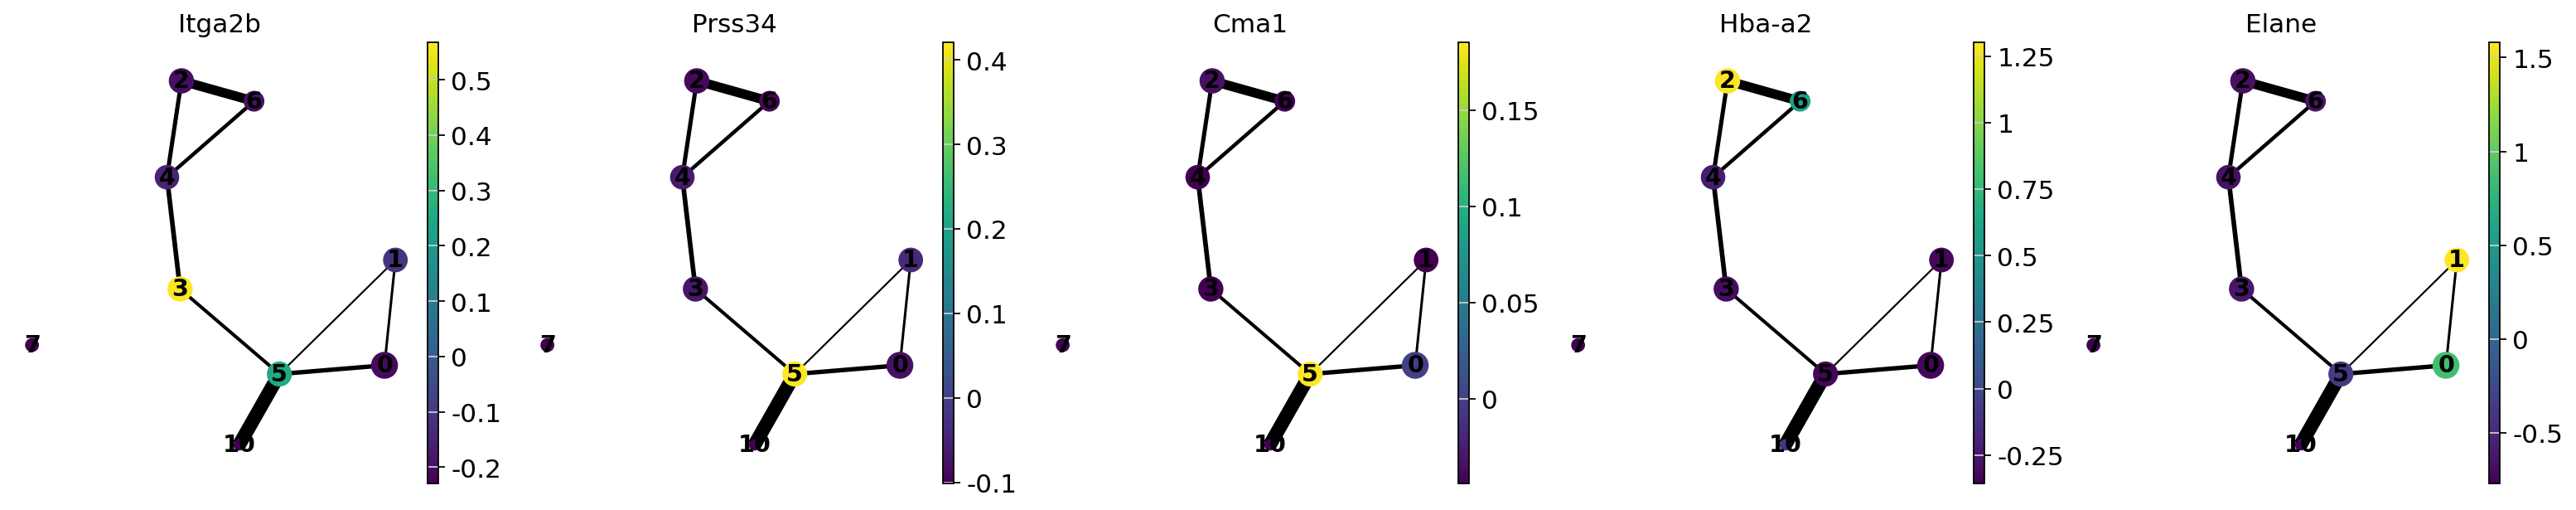

In [20]:
sc.pl.paga(adata, color=['Itga2b', 'Prss34', 'Cma1', 'Hba-a2', 'Elane'])